## Turkcell istenmeyen mesajları tespit etmek
- Eski mesajlara bakıp öğrenecek ve gelecek olan gereksiz mesajları atacak

In [1]:
!pip install stop-words

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#NLP
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
import re
#WordCloud
from wordcloud import WordCloud,STOPWORDS

#Machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix



In [3]:
df=pd.read_csv('spam.csv',encoding="latin-1")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2685,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
2914,ham,Nothing lor... A bit bored too... Then y dun u...,NaN,NaN,NaN
1076,ham,Where can download clear movies. Dvd copies.,NaN,NaN,NaN
4015,ham,In which place i can get rooms cheap:-),NaN,NaN,NaN
3838,ham,Erm Û_ ill pick you up at about 6.45pm. That'...,NaN,NaN,NaN


In [4]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df.columns=['Class','Text']
df['Label']=df.Class.map({"ham":0,"spam":1})

In [5]:
df.sample(5)

,Class,Text,Label
217,ham,Easy ah?sen got selected means its good..,0
1289,ham,Hey...Great deal...Farm tour 9am to 5pm $95/pa...,0
914,ham,"Call me da, i am waiting for your call.",0
4750,spam,Your weekly Cool-Mob tones are ready to downlo...,1
1665,ham,Dunno cos i was v late n when i reach they ins...,0


In [6]:
df.groupby('Class').describe(include='O')
#include="O" sayesinde object olan sütunlarda alınır
#747 tane spam,4825 tane ham mesaj varmış
#4516 unique mesaj var
#en çok tekrar eden Sorry, I'll call later  30 tane

Text                                                               
      count unique                                                top freq
Class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

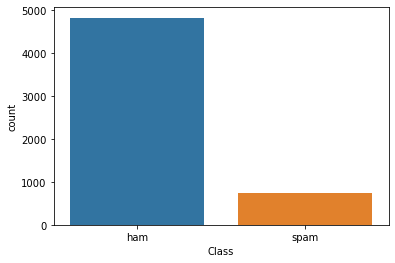

In [7]:
sns.countplot(data=df,x='Class');

In [8]:
Ham_texts=df.query("Class=='ham'")['Text']
Spam_texts=df.query("Class=='spam'")['Text']

In [9]:
Ham_texts

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 4825, dtype: object

In [10]:
Spam_texts

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: Text, Length: 747, dtype: object

In [11]:
#hem spam olanlar hem ham olanlar için kullanacağımız için fonk. yazmış
#ama bizim geçen hafta yaptığımız gibi .str şeklinde yapsak daha iyi
#df['text']=df['text'].str.lower() gibi
def words_cleaner(data):
    words=[re.sub('[^a-zA-Z]', ' ',i) for i in df['Text']]
    words=[i.lower() for j in data for i in j.split()]### Spliting all the sentences into words
    words=[i for i in words if not i in set(stopwords.words('english'))]## removing stopwords
    words=[i for i in words if len(i)>2]## removing words with less than two characters
    return words


In [12]:
stopwords.words("english")
#ingilizcedeki gereksiz kelimeler yukarıda fonk. bunları kaldırdık

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
#bulut resmi için fonk.
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')


In [14]:

Ham_texts=df.query("Class=='ham'")['Text']
ham_words=words_cleaner(Ham_texts)
ham_words_freq=nltk.FreqDist(ham_words)
ham_words_freq=pd.DataFrame(ham_words_freq.most_common(10),columns=['Top_Words','Frequency'])

In [15]:
ham_words_freq

,Top_Words,Frequency
0,i'm,369
1,get,293
2,&lt;#&gt;,276
3,got,227
4,like,221
5,call,215
6,come,215
7,know,208
8,good,187
9,i'll,167


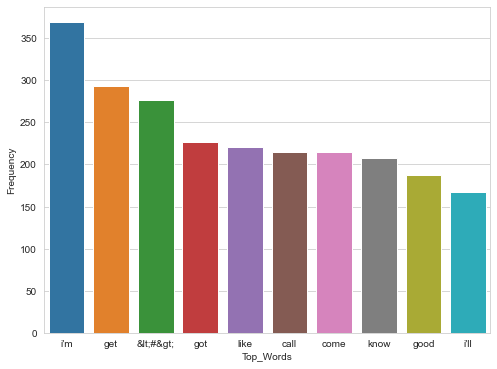

In [16]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
ax=sns.barplot(x='Top_Words',y='Frequency',data=ham_words_freq);

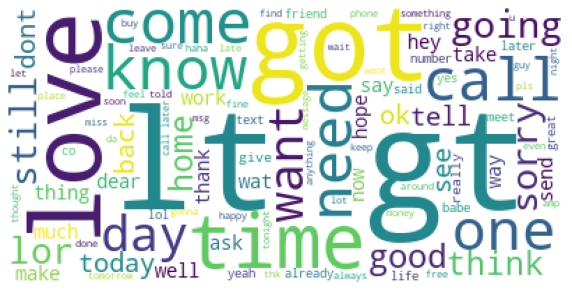

In [17]:
wc(ham_words,'white')

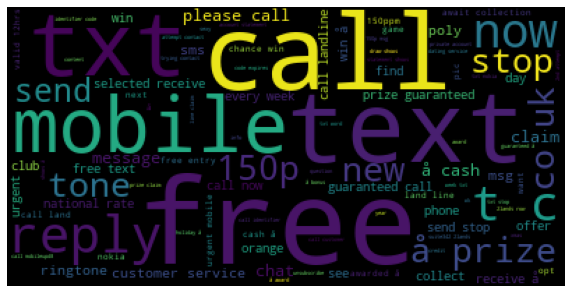

In [18]:
wc(words_cleaner(Spam_texts),'black')

In [19]:
def features_cleaner(data):
    clean_txt=[]
    for i in range(0,len(data)):
        text=re.sub('[^a-zA-Z]', ' ',data[i])
        text=text.lower()
        text=text.split()#tokenize ile de yapabilirdik
        ps=PorterStemmer()
        text= [ps.stem(j) for j in text if not j in set(stopwords.words('english'))]
        text=' '.join(text)
        clean_txt.append(text) 
    return clean_txt

        

In [20]:
X=features_cleaner(df['Text'])
y=df['Label']

In [21]:
for i in range(0,3):
    print(df['Text'][i])
print('********************************       After Cleaning      ********************************')
for i in range(0,3):
    print(X[i])


Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
********************************       After Cleaning      ********************************
go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli


In [22]:
cv=CountVectorizer()
X=cv.fit_transform(X)
#fit_transfrom dersen matrix e dönüşür
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=50)

In [23]:
pd.DataFrame(X_train)

,0
0,"(0, 830)\t1\n (0, 5727)\t1\n (0, 3538)\t1\..."
1,"(0, 322)\t1\n (0, 1540)\t1"
2,"(0, 2431)\t1\n (0, 1038)\t1\n (0, 635)\t1"
3,"(0, 1270)\t1\n (0, 4466)\t1\n (0, 972)\t1\..."
4,"(0, 2148)\t1\n (0, 5886)\t1\n (0, 5044)\t2..."
...,...
4174,"(0, 3928)\t1\n (0, 3399)\t1\n (0, 1129)\t1..."
4175,"(0, 3185)\t1\n (0, 5849)\t1\n (0, 3119)\t1..."
4176,"(0, 4268)\t1\n (0, 1892)\t1\n (0, 221)\t1"
4177,"(0, 3291)\t1\n (0, 4403)\t1\n (0, 312)\t1\..."


In [24]:
classifier=MultinomialNB()
y_pred=classifier.fit(X_train,y_train).predict(X_test)

In [25]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[1178,   15],
       [  16,  184]], dtype=int64)

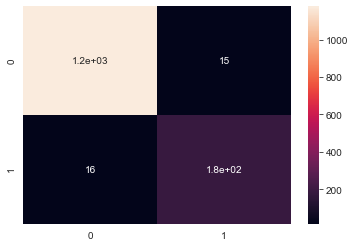

In [26]:
sns.heatmap(cf_matrix,annot=True);

In [27]:
accuracy_score(y_pred,y_test)

0.9777458722182341

In [28]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [30]:
y_pred2=r.fit(X_train,y_train).predict(X_test)
r_matrix=confusion_matrix(y_test,y_pred2)
r_matrix

array([[1193,    0],
       [  36,  164]], dtype=int64)

In [32]:
accuracy_score(y_pred2,y_test)

0.9741564967695621

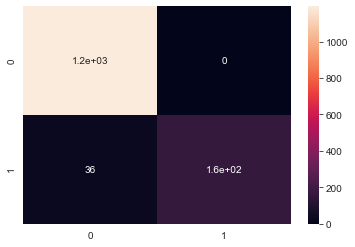

In [34]:
sns.heatmap(r_matrix,annot=True);

In [31]:
y_pred3=d.fit(X_train,y_train).predict(X_test)
d_matrix=confusion_matrix(y_test,y_pred3)
d_matrix

array([[1179,   14],
       [  31,  169]], dtype=int64)

In [33]:
accuracy_score(y_pred3,y_test)

0.9676956209619526

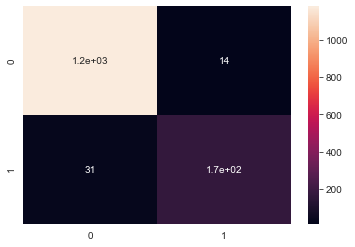

In [35]:
sns.heatmap(d_matrix,annot=True);